In [2]:
%matplotlib inline

#packages for importing scholar data
# google scholar
from scholarly import scholarly
#scopus
from pybliometrics.scopus import AuthorRetrieval

import matplotlib.pyplot as plt
import numpy as np

In [9]:
# load author data from google scholar
search_query = scholarly.search_author('Kyle Murphy')
author = next(search_query).fill(sections=['basics','indices','counts'])

citations = np.array(list(author.cites_per_year.values()), dtype=float)
year      = np.array(list(author.cites_per_year.keys()), dtype=float)

since_year = int(year.max()-5)

In [41]:
# attempt to load author data
# from scopus, otherwise use hard
# coded arrays

try:
    au = AuthorRetrieval(25723507400)
except:
    print("Can't run pybliometrics")
    pub_yr = np.array([2008.,2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020.])
    pub_nm = np.array([2,7,2,5,6,3,8,6,4,10,9,4,3])  
    totpub   = pub_nm.sum()
    totpub5y = pub_nm[np.where(pub_yr >= since_year)].sum()    



Can't run pybliometrics


Text(1.0, 0.0, '              All  Since 2015\nCitations  1641        1208\nPublications    69          36\nh-index    22          19\ni10-index    46          38\n')

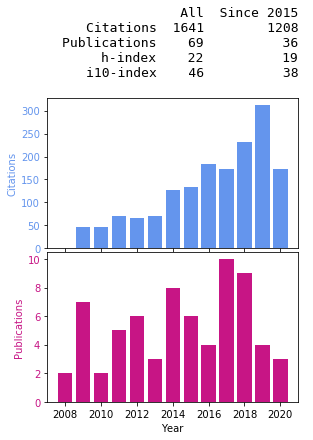

In [77]:
plt.style.use('seaborn-pastel')

# setup a simple figure
fig = plt.figure(figsize=(4.5,7))
# setup a grid layout
gs  = fig.add_gridspec(nrows=5, ncols=1, hspace=0.05)


c1 = 'cornflowerblue'
c2 = 'mediumvioletred'
wd = 0.8
xlim = [min([year.min(),pub_yr.min()])-1,max([year.max(),pub_yr.max()])+1]

f_ax1 = fig.add_subplot(gs[1:3,0])
f_ax1.bar(year,citations,color=c1,width=wd)
f_ax1.set_ylabel('Citations', color=c1)
f_ax1.tick_params(axis='y', labelcolor=c1)
f_ax1.set_xlim(xlim)
f_ax1.xaxis.set_major_formatter(plt.NullFormatter())

f_ax2 = fig.add_subplot(gs[3:,0])
f_ax2.bar(pub_yr,pub_nm, width=wd,color=c2)
f_ax2.set_xlabel('Year')
f_ax2.set_ylabel('Publications', color=c2)
f_ax2.tick_params(axis='y', labelcolor=c2)
f_ax2.set_xlim(xlim)


#create plot and text for scholar output plot
f_ax3 = fig.add_subplot(gs[0,0])
f_ax3.axis('off')
f_ax3.axis([0,1,0,1])


text = ''' {0:>16}  {1:5} {2:4}
Citations {3:5}  {4:10}
Publications {9:5}  {10:10}
h-index {5:5}  {6:10}
i10-index {7:5}  {8:10}
'''.format('All', 'Since', since_year,
       author.citedby, author.citedby5y, 
       author.hindex, author.hindex5y,
       author.i10index, author.i10index5y,
          totpub, totpub5y)

f_ax3.text(1.,0.0,text,horizontalalignment='right', verticalalignment='bottom', family='monospace', size=13)



In [80]:
fig.savefig('ScholarFig')